In [ ]:
# masukkan module yang dipergunakan buat klasifikasi yah
import datetime

time1 = datetime.datetime.now()

import tensorflow as tf

# cek versi tf
print(tf.__version__)

2.5.0


In [ ]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-27 04:00:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  6.85MB/s    in 57s     

2021-07-27 04:01:08 (5.41 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
!unzip /content/rockpaperscissors.zip -d /content
!mkdir /content/rockpaperscissors/train
!mv /content/rockpaperscissors/paper /content/rockpaperscissors/rock /content/rockpaperscissors/scissors /content/rockpaperscissors/train
!mkdir /content/rockpaperscissors/test
!mv /content/rockpaperscissors/rps-cv-images/paper /content/rockpaperscissors/rps-cv-images/rock /content/rockpaperscissors/rps-cv-images/scissors /content/rockpaperscissors/test
!rm /content/rockpaperscissors/README_rpc-cv-images.txt
!rm -rf /content/rockpaperscissors/rps-cv-images
!rm -rf /content/__MACOSX
!rm /content/rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: /content/rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: /content/rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: /content/rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: /content/rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: /content/rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: /content/__MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: /conte

In [ ]:
folderku_train = '/content/rockpaperscissors/train'
folderku_test  = '/content/rockpaperscissors/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_imagegen = ImageDataGenerator()
test_imagegen = ImageDataGenerator()

In [ ]:
ukuran_batch = 32
gambar_tinggi = 180
gambar_lebar = 180

In [ ]:
trainingku = tf.keras.preprocessing.image_dataset_from_directory(
              folderku_train,
              validation_split = 0.3995,
              subset="training",
              seed=123,
              image_size=(gambar_tinggi,gambar_lebar),
              batch_size=32
            )
trainingku

Found 2188 files belonging to 3 classes.
Using 1314 files for training.


<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
testku = tf.keras.preprocessing.image_dataset_from_directory(
              folderku_test,
              validation_split = 0.3995,
              subset="validation",
              seed=123,
              image_size=(gambar_tinggi,gambar_lebar),
              batch_size=32
            )
testku

Found 2188 files belonging to 3 classes.
Using 874 files for validation.


<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

**Untuk modelnya tersebut saya copy paste dikarenakan Sulitnya penentuan hidden layers pada Image Classification**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
num_class = 3

model = Sequential([
          layers.experimental.preprocessing.Rescaling(1./255, input_shape=(gambar_tinggi, gambar_lebar, 3)),
          layers.Conv2D(16, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(32, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Conv2D(64, 3, padding='same', activation='relu'),
          layers.MaxPooling2D(),
          layers.Flatten(),
          layers.Dense(128, activation='relu'),
          layers.Dense(num_class)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(
      trainingku,
      validation_data=testku,
      epochs=25)

Epoch 1/25
42/42 [==============================] - 47s 1s/step - loss: 0.9938 - accuracy: 0.5852 - val_loss: 0.4029 - val_accuracy: 0.8719
Epoch 2/25
42/42 [==============================] - 47s 1s/step - loss: 0.3340 - accuracy: 0.8798 - val_loss: 0.2442 - val_accuracy: 0.9268
Epoch 3/25
42/42 [==============================] - 47s 1s/step - loss: 0.1895 - accuracy: 0.9307 - val_loss: 0.1866 - val_accuracy: 0.9405
Epoch 4/25
42/42 [==============================] - 47s 1s/step - loss: 0.1449 - accuracy: 0.9513 - val_loss: 0.2045 - val_accuracy: 0.9279
Epoch 5/25
42/42 [==============================] - 47s 1s/step - loss: 0.1011 - accuracy: 0.9642 - val_loss: 0.1938 - val_accuracy: 0.9371
Epoch 6/25
42/42 [==============================] - 47s 1s/step - loss: 0.0575 - accuracy: 0.9787 - val_loss: 0.1280 - val_accuracy: 0.9611
Epoch 7/25
42/42 [==============================] - 47s 1s/step - loss: 0.0293 - accuracy: 0.9916 - val_loss: 0.2211 - val_accuracy: 0.9451
Epoch 8/25
42/42 [==

Saving gunting.png to gunting.png
gunting.png
[[1.3004518 1.278568  3.0940602]]
scissors


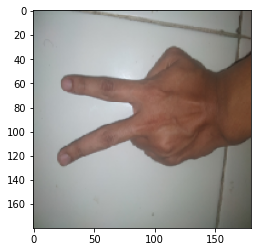

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
unggah = files.upload()
 
for fn in unggah.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(gambar_tinggi,gambar_lebar))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  pembanding = np.array([i for sublisted in classes for i in sublisted])
  pembanding = np.argmax(pembanding)

  print(fn)
  print(classes)
  if(pembanding ==0):
    print('paper')
  elif(pembanding==1):
    print('rock')
  else:
    print('scissors')

In [ ]:
time2 = datetime.datetime.now()

selisih_waktu = time2-time1
selisih_waktu = selisih_waktu.total_seconds() / 60

In [ ]:
print('selisih waktunya : ',selisih_waktu,'minutes')

selisih waktunya :  27.917345033333334 minutes
